# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr
import scipy.stats as st

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL 

# define url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | inongo
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | krasnyy kholm
Processing Record 6 of Set 1 | awjilah
Processing Record 7 of Set 1 | grindavik
Processing Record 8 of Set 1 | cidreira
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | srednekolymsk
Processing Record 11 of Set 1 | hami
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | superior
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | turukhansk
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | beni mazar
Processing Record 19 of Set 1 | kawalu
Processing Record 20 of Set 1 | kavieng
Processing Record 21 of Set 1 | whitianga
Processing Record 22 of Set 1 | tiksi
Processing Record 23 of Set 1 | cape town
P

Processing Record 40 of Set 4 | mattru
Processing Record 41 of Set 4 | maltahohe
Processing Record 42 of Set 4 | kelvington
Processing Record 43 of Set 4 | ayagoz
Processing Record 44 of Set 4 | fort nelson
Processing Record 45 of Set 4 | tiarei
Processing Record 46 of Set 4 | sisimiut
Processing Record 47 of Set 4 | dahuk
Processing Record 48 of Set 4 | hithadhoo
Processing Record 49 of Set 4 | san carlos de bariloche
Processing Record 0 of Set 5 | college
Processing Record 1 of Set 5 | ughelli
Processing Record 2 of Set 5 | stara paka
Processing Record 3 of Set 5 | kieta
Processing Record 4 of Set 5 | avarua
Processing Record 5 of Set 5 | yulara
Processing Record 6 of Set 5 | birmitrapur
Processing Record 7 of Set 5 | upernavik
Processing Record 8 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 9 of Set 5 | saleaula
City not found. Skipping...
Processing Record 10 of Set 5 | sept-iles
Processing Record 11 of Set 5 | cherskiy
Processing Record 12 of Set

Processing Record 32 of Set 8 | belyy yar
Processing Record 33 of Set 8 | flinders
Processing Record 34 of Set 8 | thio
Processing Record 35 of Set 8 | aklavik
Processing Record 36 of Set 8 | nemuro
Processing Record 37 of Set 8 | acarau
Processing Record 38 of Set 8 | luena
Processing Record 39 of Set 8 | beinamar
Processing Record 40 of Set 8 | grootfontein
Processing Record 41 of Set 8 | zhuanghe
Processing Record 42 of Set 8 | haibowan
City not found. Skipping...
Processing Record 43 of Set 8 | boende
Processing Record 44 of Set 8 | baykit
Processing Record 45 of Set 8 | panguipulli
Processing Record 46 of Set 8 | bethel
Processing Record 47 of Set 8 | guiyang
Processing Record 48 of Set 8 | bilara
Processing Record 49 of Set 8 | pokaran
Processing Record 0 of Set 9 | alofi
Processing Record 1 of Set 9 | hearst
Processing Record 2 of Set 9 | dunmore east
Processing Record 3 of Set 9 | huilong
Processing Record 4 of Set 9 | emerald
Processing Record 5 of Set 9 | nanortalik
Processin

Processing Record 21 of Set 12 | george
Processing Record 22 of Set 12 | cap malheureux
Processing Record 23 of Set 12 | ayaviri
Processing Record 24 of Set 12 | samusu
City not found. Skipping...
Processing Record 25 of Set 12 | halifax
Processing Record 26 of Set 12 | kampong thum
Processing Record 27 of Set 12 | viedma
Processing Record 28 of Set 12 | narasannapeta
Processing Record 29 of Set 12 | ulaangom
Processing Record 30 of Set 12 | ghiror
Processing Record 31 of Set 12 | joshimath
Processing Record 32 of Set 12 | sayyan
Processing Record 33 of Set 12 | santa isabel do rio negro
Processing Record 34 of Set 12 | marataizes
Processing Record 35 of Set 12 | hobyo
Processing Record 36 of Set 12 | mangan
Processing Record 37 of Set 12 | port hope
Processing Record 38 of Set 12 | chirongui
Processing Record 39 of Set 12 | ogembo
Processing Record 40 of Set 12 | baghdad
Processing Record 41 of Set 12 | timmins
Processing Record 42 of Set 12 | tagusao
Processing Record 43 of Set 12 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,inongo,-1.9500,18.2667,23.23,87,99,1.80,CD,1682881720
1,albany,42.6001,-73.9662,13.23,86,100,2.24,US,1682881720
2,butaritari,3.0707,172.7902,28.21,81,45,8.39,KI,1682881720
3,rikitea,-23.1203,-134.9692,25.44,81,15,4.00,PF,1682881720
4,krasnyy kholm,58.0607,37.1203,6.61,77,100,1.76,RU,1682881721
...,...,...,...,...,...,...,...,...,...
557,ca mau,9.1769,105.1500,27.57,79,56,3.40,VN,1682881850
558,goderich,43.7501,-81.7165,6.06,93,100,1.81,CA,1682881629
559,kuryk,43.2000,51.6500,18.19,56,100,6.31,KZ,1682881851
560,semnan,35.5729,53.3971,20.86,38,46,3.07,IR,1682881851


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,inongo,-1.9500,18.2667,23.23,87,99,1.80,CD,1682881720
1,albany,42.6001,-73.9662,13.23,86,100,2.24,US,1682881720
2,butaritari,3.0707,172.7902,28.21,81,45,8.39,KI,1682881720
3,rikitea,-23.1203,-134.9692,25.44,81,15,4.00,PF,1682881720
4,krasnyy kholm,58.0607,37.1203,6.61,77,100,1.76,RU,1682881721


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

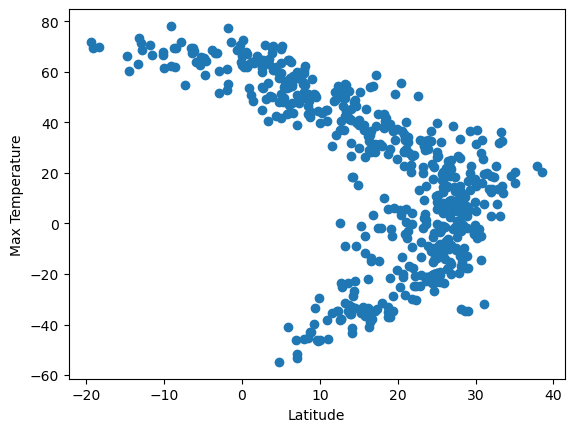

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

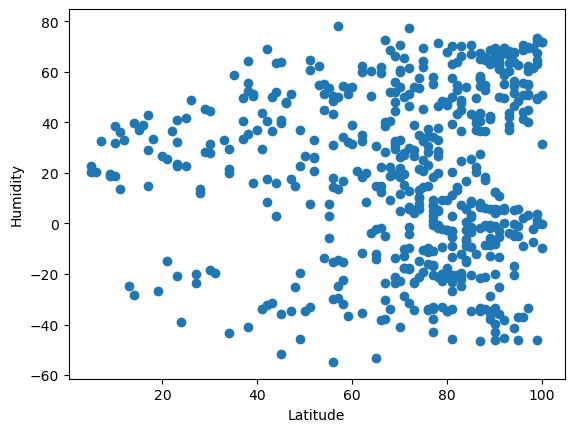

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

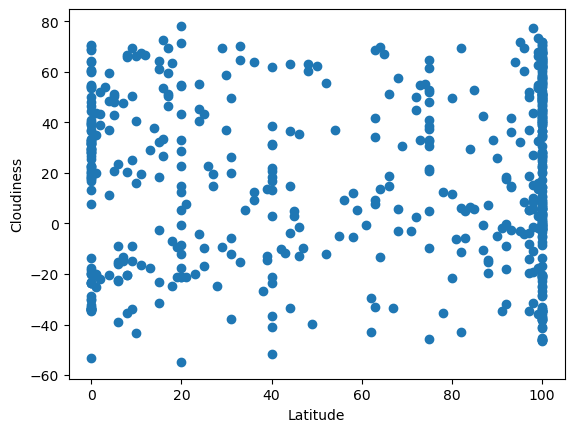

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

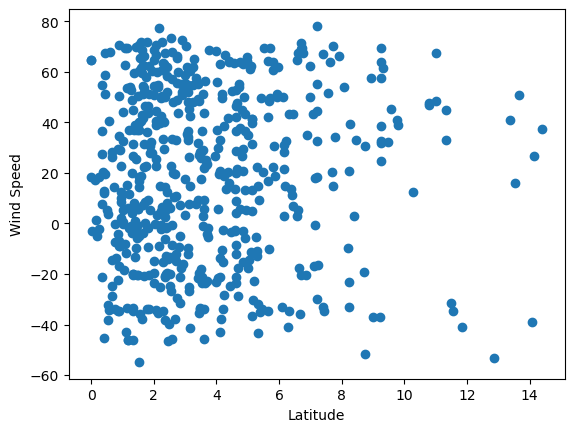

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def line_reg(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,13.23,86,100,2.24,US,1682881720
2,butaritari,3.0707,172.7902,28.21,81,45,8.39,KI,1682881720
4,krasnyy kholm,58.0607,37.1203,6.61,77,100,1.76,RU,1682881721
5,awjilah,29.1081,21.2869,23.53,17,0,3.57,LY,1682881721
6,grindavik,63.8424,-22.4338,6.26,45,0,9.26,IS,1682881721


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,inongo,-1.9500,18.2667,23.23,87,99,1.80,CD,1682881720
3,rikitea,-23.1203,-134.9692,25.44,81,15,4.00,PF,1682881720
7,cidreira,-30.1811,-50.2056,22.41,67,0,5.16,BR,1682881721
8,busselton,-33.6500,115.3333,14.47,87,67,3.49,AU,1682881721
13,hermanus,-34.4187,19.2345,15.97,73,0,0.56,ZA,1682881722


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8630193155320606


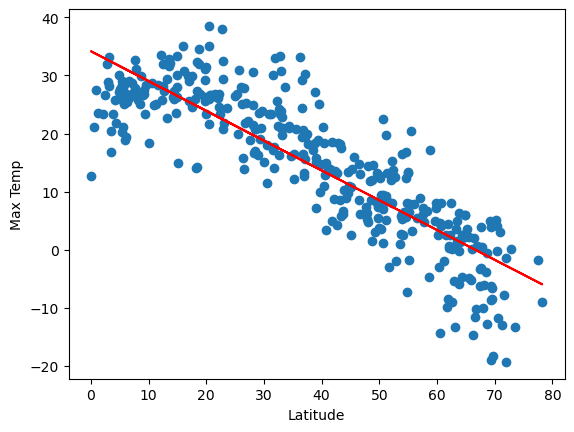

In [15]:
# Linear regression on Northern Hemisphere
line_reg(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.7158846806335005


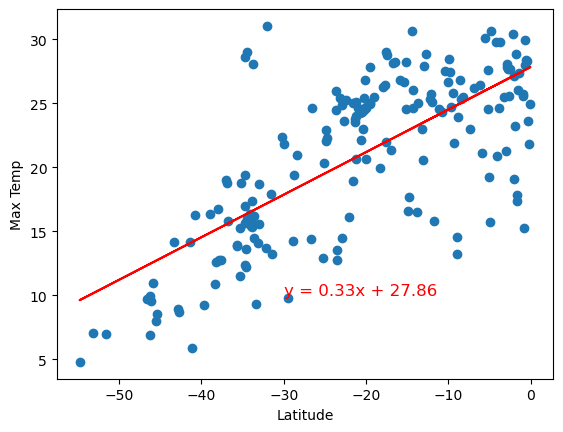

In [16]:
# Linear regression on Southern Hemisphere
line_reg(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 10))

Analysis of relationship between latitude and temperature:
    
    - For the Northern Hemisphere, there is a strong negative correlation between latitude and temperature.

    - For the Southern Hemisphere, there is a strong positive correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1981980921732846


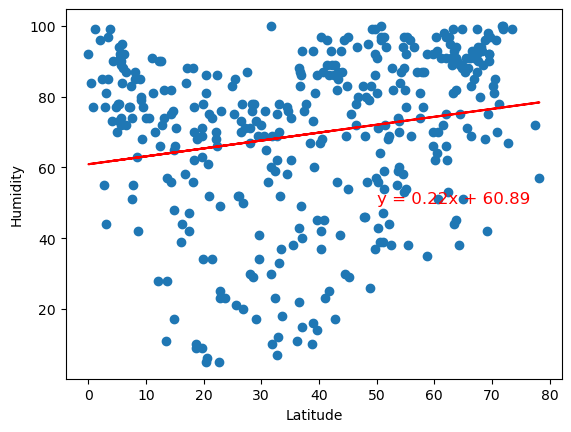

In [17]:
# Northern Hemisphere
line_reg(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 50))

The r-value is: 0.21851855762142056


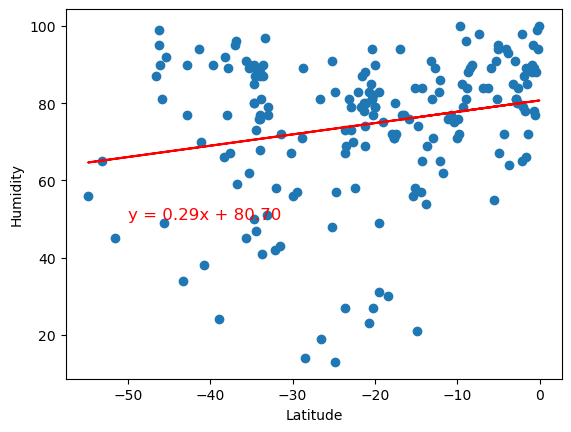

In [18]:
# Southern Hemisphere
line_reg(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-50, 50))

Analysis of reationship between latitude and humidity:
    
    - For the Northern Hemisphere, there is a strong positive correlation between latitude and humidity. 
    
    - For the Southern Hemisphere, there is a strong positive correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.002422352179182035


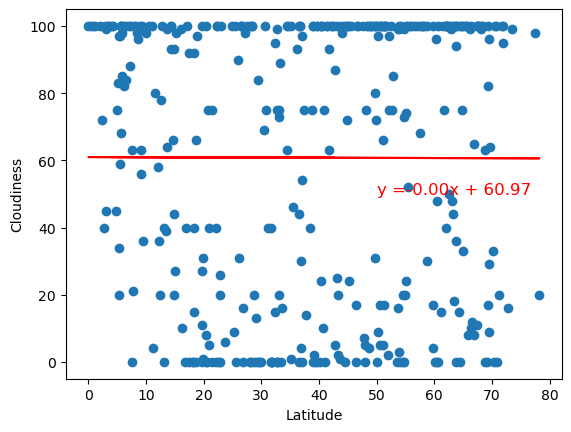

In [19]:
# Northern Hemisphere
line_reg(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (50, 50))

The r-value is: 0.09012671688183337


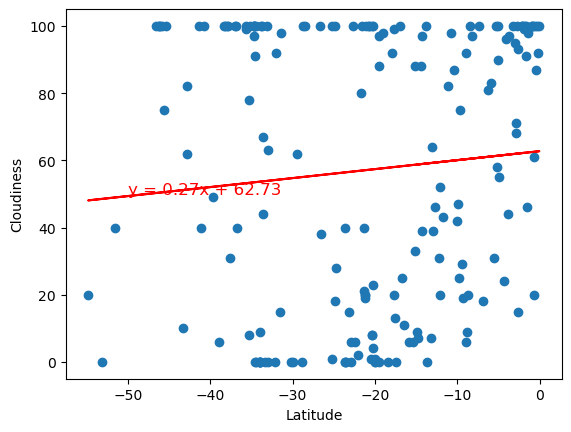

In [20]:
# Southern Hemisphere
line_reg(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

Analysis of reationship between latitude and cloudiness:

- For the Northern Hemisphere, there is a weak positive correlation between latitude and humidity. 

- For the Southern Hemisphere, there is a strong positive correlation between latitude and humidity.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07665247438973316


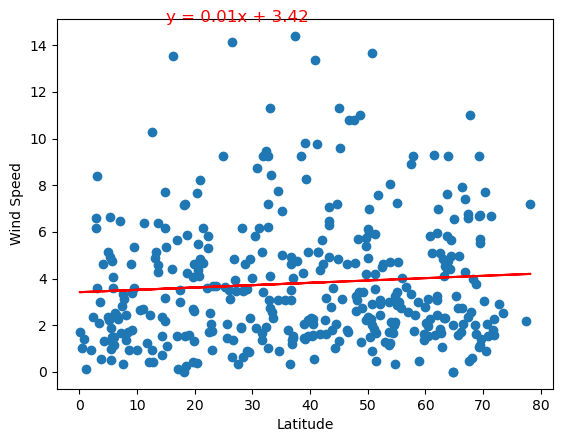

In [21]:
# Northern Hemisphere
line_reg(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (15, 15))

The r-value is: -0.2561056923191


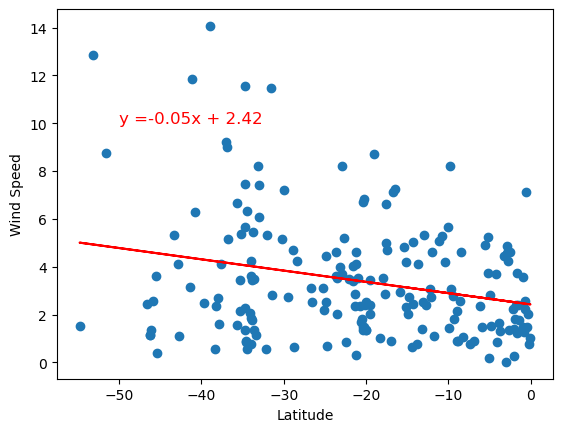

In [22]:
# Southern Hemisphere
line_reg(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 10))

Analysis of reationship between latitude and humidity:

- For the Northern Hemisphere, there is minimal negative correlation between latitude and wind speed. 

- For the Southern Hemisphere, there is a weak negative correlation between latitude and wind speed.